<h1 style="text-align:center; color:blue; font-size:48px;">
🐼 Análisis de datos en Pandas 🐼
</h1>

<h2 style="text-align:center; color:gold; font-size:28px;">
Tarea S10.01
</h2>


### Descripción Sprint 10 ###

En esta tarea te enfrentarás a un ejercicio de limpieza y análisis de datos.  
Disponemos de un dataset procedente de una encuesta realizada a nuestros trabajadores y trabajadoras,  
y debemos garantizar que los datos se procesan correctamente, tanto en su formato como en su legibilidad.

<h5 style="color:#ff6666; font-size:1.1em;">Consideraciones técnicas sobre la estructura y los idiomas</h5>

<p style="font-size:0.8em;">
He utilizado el idioma castellano en los comentarios, pero los datos de la tabla importada están en catalán.<br>
Así como las columnas añadidas y otros elementos generados durante la ejecución del proceso.<br>
Este aspecto es relevante para evitar posibles ambigüedades en la interpretación del flujo de trabajo.
</p>


### Nivel 1 ###

#### Tarea n.1 ####

- a. Importa como un DataFrame el archivo sprint10.xlsx. 
- b. Asegúrate de que el fichero se importa correctamente,
     con los nombres de columna que le corresponden, sin manipular el archivo original.  
- c. Ordena el DataFrame por el país de origen. En caso de empate, ordénalo por el nombre de la ciudad.  
- d. Muestra las primeras 10 filas.  
- e. Además, haz un print para comprobar que el DNI solo contiene valores únicos.

In [1]:
# Librerías y módulos para la ejecución de las tareas

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date, timedelta

In [2]:
# a. Importación: Los encabezados están en la fila 2 y el índice corresponde a "Unnamed: 0"

df = pd.read_excel(r"Archivos\sprint10.xlsx",header= 3,index_col = "Unnamed: 0")


In [3]:
# b. Control genérico del DataFrame importado


df.info()
print("\n" + "-"*80 + "\n")

display(round(df.describe()),2)

print("\n" + "-"*80 + "\n")
df


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nom                1000 non-null   object 
 1   Cognoms            1000 non-null   object 
 2   DNI                1000 non-null   object 
 3   País d'origen      1000 non-null   object 
 4   Ciutat             1000 non-null   object 
 5   Dia de Naixement   1000 non-null   int64  
 6   Mes de Naixement   1000 non-null   int64  
 7   Any de Naixement   1000 non-null   int64  
 8   Gènere             1000 non-null   object 
 9   Salari mensual     1000 non-null   object 
 10  Fills              406 non-null    float64
 11  No Fills           594 non-null    float64
 12  Grup Professional  1000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 109.4+ KB

--------------------------------------------------------------------------------



,Dia de Naixement,Mes de Naixement,Any de Naixement,Fills,No Fills
count,1000.0,1000.0,1000.0,406.0,594.0
mean,15.0,6.0,1976.0,1.0,1.0
std,8.0,3.0,16.0,0.0,0.0
min,1.0,1.0,1950.0,1.0,1.0
25%,8.0,3.0,1962.0,1.0,1.0
50%,15.0,6.0,1976.0,1.0,1.0
75%,22.0,9.0,1990.0,1.0,1.0
max,28.0,12.0,2005.0,1.0,1.0


2


--------------------------------------------------------------------------------



,Nom,Cognoms,DNI,País d'origen,Ciutat,Dia de Naixement,Mes de Naixement,Any de Naixement,Gènere,Salari mensual,Fills,No Fills,Grup Professional
0,Inês,Ferreira Silva,16928694K,Portugal,Lisboa,25,2,1953,D,1.144 €,NaN,1.0,Grup B
1,Clara,Sánchez Martínez,27724652S,Espanya,Barcelona,18,3,1996,D,1.253 €,1.0,NaN,Grup A
2,Fatima,Fassi,38141675A,Marroc,Rabat,6,11,2005,A,1.441 €,1.0,NaN,Grup A
3,Khadija,Bennani Bennani,59157262R,Marroc,Rabat,20,1,1995,D,1.944 €,NaN,1.0,Grup B
4,Toni,Sánchez García,69630528M,Espanya,Barcelona,9,8,1999,H,1.043 €,NaN,1.0,Grup A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Marta,Ferrer Ferrer,25161375F,Espanya,Sevilla,1,6,1951,D,1.216 €,NaN,1.0,Grup B
996,Joan,García,52145541P,Espanya,Sevilla,11,4,1959,H,971 €,NaN,1.0,Grup A
997,Laia,Ferrer Martínez,69760120X,Espanya,Barcelona,11,11,1980,D,682 €,NaN,1.0,Grup A
998,Jordi,García,82947791W,Espanya,Barcelona,23,5,1984,H,1.699 €,1.0,NaN,Grup C


In [4]:
# Creo una copia de seguridad, además de realizar algunas limpiezas básicas para evitar errores en las próximas tareas

df_c = df.copy()

df_c.columns = df_c.columns.str.strip()

df_c = df_c.dropna(how="all")

In [5]:
# c. Ordeno el DataFrame por país de origen y ciudad

df_c.sort_values(by =["País d'origen","Ciutat"], ascending= True)

,Nom,Cognoms,DNI,País d'origen,Ciutat,Dia de Naixement,Mes de Naixement,Any de Naixement,Gènere,Salari mensual,Fills,No Fills,Grup Professional
21,Mia,Schneider Fischer,28973553Z,Alemanya,Berlín,22,10,1976,A,951 €,NaN,1.0,Grup A
154,Laura,Schneider Fischer,37399141L,Alemanya,Berlín,2,2,1958,D,1.769 €,1.0,NaN,Grup B
224,Lea,Schneider Schneider,37368317L,Alemanya,Berlín,23,10,2005,D,2.013 €,NaN,1.0,Grup B
278,Mia,Fischer,21390098Z,Alemanya,Berlín,11,8,1950,D,1.557 €,1.0,NaN,Grup B
602,Jonas,Schneider,44060014R,Alemanya,Berlín,22,11,1985,H,2.754 €,1.0,NaN,Grup D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Emily,Taylor Jones,89577876S,Regne Unit,Manchester,28,3,1958,D,2.033 €,NaN,1.0,Grup B
728,George,Brown Jones,57441590Y,Regne Unit,Manchester,27,12,1979,H,1.130 €,1.0,NaN,Grup A
751,Olivia,Brown Brown,58204038A,Regne Unit,Manchester,28,8,1952,A,1.023 €,NaN,1.0,Grup A
854,Isla,Jones Brown,28367234K,Regne Unit,Manchester,28,3,1999,D,1.197 €,NaN,1.0,Grup A


In [6]:
# d. Primera 10 filas

df_c.head(10)

,Nom,Cognoms,DNI,País d'origen,Ciutat,Dia de Naixement,Mes de Naixement,Any de Naixement,Gènere,Salari mensual,Fills,No Fills,Grup Professional
0,Inês,Ferreira Silva,16928694K,Portugal,Lisboa,25,2,1953,D,1.144 €,NaN,1.0,Grup B
1,Clara,Sánchez Martínez,27724652S,Espanya,Barcelona,18,3,1996,D,1.253 €,1.0,NaN,Grup A
2,Fatima,Fassi,38141675A,Marroc,Rabat,6,11,2005,A,1.441 €,1.0,NaN,Grup A
3,Khadija,Bennani Bennani,59157262R,Marroc,Rabat,20,1,1995,D,1.944 €,NaN,1.0,Grup B
4,Toni,Sánchez García,69630528M,Espanya,Barcelona,9,8,1999,H,1.043 €,NaN,1.0,Grup A
5,Laia,Castells Ferrer,26930927E,Espanya,Madrid,16,12,1953,A,2.611 €,NaN,1.0,Grup D
6,Carla,García,78247593G,Espanya,València,24,12,1957,D,942 €,NaN,1.0,Grup A
7,Marco,Rossi,21774231J,Itàlia,Torí,3,11,2002,A,1.494 €,NaN,1.0,Grup A
8,Alessia,Rossi,87316866D,Itàlia,Milà,6,12,1989,D,1.366 €,NaN,1.0,Grup A
9,Toni,Martínez,14219925Z,Espanya,Barcelona,16,5,1964,H,891 €,NaN,1.0,Grup A


In [7]:
# e. DNI únicos

if len(df_c) == df_c["DNI"].nunique():
    print("Corecto, en la tabla hay DNI unicos!")
print("\n" + "-"*40 + "\n")
print("Combrobación calculos.\n\nTotales filas de la tablas: \n",len(df_c),"\nTotales DNI unicos: \n",df_c["DNI"].nunique())

Corecto, en la tabla hay DNI unicos!

----------------------------------------

Combrobación calculos.

Totales filas de la tablas: 
 1000 
Totales DNI unicos: 
 1000


#### Tarea N.2 ####  

- a. Crea una columna que contenga el nombre completo.  
- b. Crea una columna que indique si la persona ha nacido en España o no.  
- c. Pon el DNI como índice del DataFrame (nombres de las filas).  
- d. Sustituye los nombres de las columnas Dia de Naixement, Mes de Naixement y Any de Naixement por Día, Mes y Año.  
- e. Sustituye H por Home, D por Dona, A por Altres y NC por un dato faltante (nan/null/na).  
- f. Muestra todos los cambios que has realizado en una sola tabla.  

In [8]:
# a. Nueva columna: "Nom complet"

df_c["Nom_complet"] = df["Nom"] +" "+ df["Cognoms"]

In [9]:
# b. Nueva columna: "Nacionalitat espanyola"

df_c["Nacionalitat espanyola"] = df_c["País d\'origen"].apply(lambda x : "Si" if x == "Espanya" else "No")

In [10]:
# c. Defino el índice como "DNI" tras eliminar los espacios del nombre de la column

df_c = df_c.reset_index(drop=True).set_index("DNI")

df_c


,Nom,Cognoms,País d'origen,Ciutat,Dia de Naixement,Mes de Naixement,Any de Naixement,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nacionalitat espanyola
DNI,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,D,1.144 €,NaN,1.0,Grup B,Inês Ferreira Silva,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,D,1.253 €,1.0,NaN,Grup A,Clara Sánchez Martínez,Si
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,A,1.441 €,1.0,NaN,Grup A,Fatima Fassi,No
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,D,1.944 €,NaN,1.0,Grup B,Khadija Bennani Bennani,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,H,1.043 €,NaN,1.0,Grup A,Toni Sánchez García,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,D,1.216 €,NaN,1.0,Grup B,Marta Ferrer Ferrer,Si
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,H,971 €,NaN,1.0,Grup A,Joan García,Si
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,D,682 €,NaN,1.0,Grup A,Laia Ferrer Martínez,Si


In [11]:
# d. Cambio de nombres de columnas

df_c = df_c.rename(columns={"Dia de Naixement":"Dia","Mes de Naixement":"Mes","Any de Naixement":"Any"}) 
df_c

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nacionalitat espanyola
DNI,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,D,1.144 €,NaN,1.0,Grup B,Inês Ferreira Silva,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,D,1.253 €,1.0,NaN,Grup A,Clara Sánchez Martínez,Si
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,A,1.441 €,1.0,NaN,Grup A,Fatima Fassi,No
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,D,1.944 €,NaN,1.0,Grup B,Khadija Bennani Bennani,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,H,1.043 €,NaN,1.0,Grup A,Toni Sánchez García,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,D,1.216 €,NaN,1.0,Grup B,Marta Ferrer Ferrer,Si
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,H,971 €,NaN,1.0,Grup A,Joan García,Si
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,D,682 €,NaN,1.0,Grup A,Laia Ferrer Martínez,Si


In [12]:
# e. Sustituye "H por Home", "D por "Dona", "A por Altres" y "NC por un dato faltante "NaN"

def cambios_col_gènere(x):

    if x == "H":
        return "Home"
    elif x == "D":
        return "Dona"
    elif x == "A":
        return "Altres"
    else:
        return np.nan
    

df_c["Gènere"] = df_c["Gènere"].apply(lambda x : cambios_col_gènere(x))


In [13]:
# f. Muestro los cambios realizados

df_c

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nacionalitat espanyola
DNI,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1.144 €,NaN,1.0,Grup B,Inês Ferreira Silva,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1.253 €,1.0,NaN,Grup A,Clara Sánchez Martínez,Si
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1.441 €,1.0,NaN,Grup A,Fatima Fassi,No
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1.944 €,NaN,1.0,Grup B,Khadija Bennani Bennani,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1.043 €,NaN,1.0,Grup A,Toni Sánchez García,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1.216 €,NaN,1.0,Grup B,Marta Ferrer Ferrer,Si
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971 €,NaN,1.0,Grup A,Joan García,Si
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682 €,NaN,1.0,Grup A,Laia Ferrer Martínez,Si


In [14]:
# Control genérico de los cambios

df_c.info()
print("\n" + "-"*80 + "\n")

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 16928694K to 89253307W
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nom                     1000 non-null   object 
 1   Cognoms                 1000 non-null   object 
 2   País d'origen           1000 non-null   object 
 3   Ciutat                  1000 non-null   object 
 4   Dia                     1000 non-null   int64  
 5   Mes                     1000 non-null   int64  
 6   Any                     1000 non-null   int64  
 7   Gènere                  940 non-null    object 
 8   Salari mensual          1000 non-null   object 
 9   Fills                   406 non-null    float64
 10  No Fills                594 non-null    float64
 11  Grup Professional       1000 non-null   object 
 12  Nom_complet             1000 non-null   object 
 13  Nacionalitat espanyola  1000 non-null   object 
dtypes: float64(2), int64(3), object(

#### Tarea n.3 ####

- Junta las columnas de Fills y No Fills en una sola columna, usando el método.apply() y definiendo una función que resuelve el problema.  
  La nueva columna debe llamarse ""Fills"" y tomar los valores "Sí" o "No"

In [15]:
# Preparo los datos

df_c["Fills"] = df_c["Fills"].fillna(0)
df_c["No Fills"] = df_c["No Fills"].fillna(0)

# Función

def fun(fila):
    
    if fila["Fills"] > fila["No Fills"]:
        return "Si"
    elif fila["Fills"] < fila["No Fills"]:
        return "No"
    else:
        return np.nan

# Ejecución

df_c["N_Fills"] = df_c.apply(fun,axis = 1)

df_c

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom_complet,Nacionalitat espanyola,N_Fills
DNI,,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1.144 €,0.0,1.0,Grup B,Inês Ferreira Silva,No,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1.253 €,1.0,0.0,Grup A,Clara Sánchez Martínez,Si,Si
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1.441 €,1.0,0.0,Grup A,Fatima Fassi,No,Si
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1.944 €,0.0,1.0,Grup B,Khadija Bennani Bennani,No,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1.043 €,0.0,1.0,Grup A,Toni Sánchez García,Si,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1.216 €,0.0,1.0,Grup B,Marta Ferrer Ferrer,Si,No
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971 €,0.0,1.0,Grup A,Joan García,Si,No
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682 €,0.0,1.0,Grup A,Laia Ferrer Martínez,Si,No


In [16]:
# Elimino columnas innecesarias y renombro la nueva columna "Fills"

del df_c["Fills"]
del df_c["No Fills"]

df_c.rename(columns = {'N_Fills':'Fills'})

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Grup Professional,Nom_complet,Nacionalitat espanyola,Fills
DNI,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1.144 €,Grup B,Inês Ferreira Silva,No,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1.253 €,Grup A,Clara Sánchez Martínez,Si,Si
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1.441 €,Grup A,Fatima Fassi,No,Si
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1.944 €,Grup B,Khadija Bennani Bennani,No,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1.043 €,Grup A,Toni Sánchez García,Si,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1.216 €,Grup B,Marta Ferrer Ferrer,Si,No
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971 €,Grup A,Joan García,Si,No
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682 €,Grup A,Laia Ferrer Martínez,Si,No


In [17]:
# Control valores "NaN" , hay 60 en columna "Gènere"

df_c.isna().sum()

Nom                        0
Cognoms                    0
País d'origen              0
Ciutat                     0
Dia                        0
Mes                        0
Any                        0
Gènere                    60
Salari mensual             0
Grup Professional          0
Nom_complet                0
Nacionalitat espanyola     0
N_Fills                    0
dtype: int64

#### Tarea N.4 ####

- a. Crea una tabla de resumen que te permita ver el salario promedio, medio, mínimo y máximo por género.  
- b. Ordena la tabla según el salario medio.

In [18]:
# Preparo columna "Salari mensual": Replace(),Strip(),Astype()

df_c["Salari mensual"] = df_c["Salari mensual"].str.replace("€","")

df_c["Salari mensual"] = df_c["Salari mensual"].str.replace(".","")

df_c["Salari mensual"] = df_c["Salari mensual"].str.strip()

df_c["Salari mensual"] = df_c["Salari mensual"].astype("i")

df_c

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Grup Professional,Nom_complet,Nacionalitat espanyola,N_Fills
DNI,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144,Grup B,Inês Ferreira Silva,No,No
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253,Grup A,Clara Sánchez Martínez,Si,Si
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441,Grup A,Fatima Fassi,No,Si
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944,Grup B,Khadija Bennani Bennani,No,No
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043,Grup A,Toni Sánchez García,Si,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216,Grup B,Marta Ferrer Ferrer,Si,No
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971,Grup A,Joan García,Si,No
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682,Grup A,Laia Ferrer Martínez,Si,No


In [19]:
# Groupby y Agg

df_c.groupby("Gènere")["Salari mensual"].agg(Mitjana="mean",Mediana = "median", Mínim= "min",Màxim= "max").round(2)

,Mitjana,Mediana,Mínim,Màxim
Gènere,,,,
Altres,1626.59,1545.0,703,3175
Dona,1469.44,1361.5,665,3021
Home,1643.25,1531.0,737,3356


#### Tarea N.5 ####  

- a. Crear una tabla de resumen con el salario promedio por género (filas) y país de origen (columnas).  
- b. Añadir los promedios a los márgenes de la tabla.

- c. (EXTRA): Aplica formato condicional a la tabla para ver en un color más intenso los valores más altos

In [20]:
# a. Uso Crosstable()

pd.crosstab(df_c["Gènere"],df_c["País d'origen"],df_c["Salari mensual"], aggfunc = "mean").round(2)

País d'origen,Alemanya,Argentina,Colòmbia,Espanya,França,Itàlia,Marroc,Mèxic,Portugal,Regne Unit
Gènere,,,,,,,,,,
Altres,951.00,1141.00,1030.00,1706.18,NaN,1423.00,1365.00,1372.0,1765.00,1921.00
Dona,1804.31,1291.80,1497.75,1460.16,1566.47,1247.18,1405.21,1517.8,1488.55,1489.46
Home,2067.43,1583.29,1554.67,1682.11,1389.25,1672.88,1531.00,1625.0,1497.00,1162.56


In [21]:
# b. Añado los márgenes y renombro la fila y columna "All" como "Tothom"

tabla = pd.crosstab(df_c["Gènere"],df_c["País d'origen"],df_c["Salari mensual"],margins=True, aggfunc = "mean").round(2)

tabla = tabla.rename(index={"All": "Tothom"}, columns={"All": "Tothom"})

tabla


País d'origen,Alemanya,Argentina,Colòmbia,Espanya,França,Itàlia,Marroc,Mèxic,Portugal,Regne Unit,Tothom
Gènere,,,,,,,,,,,
Altres,951.00,1141.00,1030.00,1706.18,NaN,1423.00,1365.00,1372.00,1765.00,1921.00,1626.59
Dona,1804.31,1291.80,1497.75,1460.16,1566.47,1247.18,1405.21,1517.80,1488.55,1489.46,1469.44
Home,2067.43,1583.29,1554.67,1682.11,1389.25,1672.88,1531.00,1625.00,1497.00,1162.56,1643.25
Tothom,1851.38,1463.39,1495.54,1581.21,1462.73,1425.95,1447.33,1558.42,1523.33,1423.56,1560.99


<Axes: xlabel='Gènere', ylabel="País d'origen">

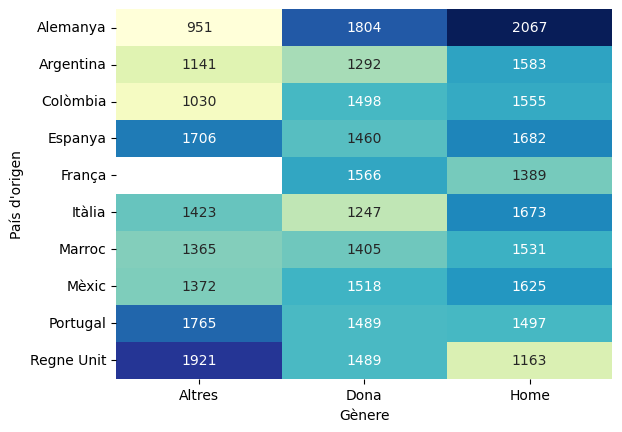

In [22]:
# Extra: genero un heatmap con Seaborn como alternativa al formato condicional tradicional

tabla = pd.crosstab(df_c["País d'origen"],df_c["Gènere"],df_c["Salari mensual"], aggfunc = "mean")

sns.heatmap(tabla,cmap="YlGnBu",annot=True,cbar=False,fmt=".0f")

#### Tarea N.6 #### 
- a. Crea una nueva columna que sea la fecha de nacimiento en formato Datetime a partir de las columnas día, mes y año.  
- b. Utilizando esta columna, crea una función que, dada una fecha, calcule la edad actual a día de hoy.  
- c. Usa la función que acabas de crear para generar una nueva columna en el DataFrame con la edad actual.  

In [23]:
# a. Nueva columna "Data de naixament" en formato datetime

df_c["Data de naixament"] = df_c.apply(lambda fila : datetime(fila["Any"],fila["Mes"],fila["Dia"]), axis= 1)

df_c

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Grup Professional,Nom_complet,Nacionalitat espanyola,N_Fills,Data de naixament
DNI,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144,Grup B,Inês Ferreira Silva,No,No,1953-02-25
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253,Grup A,Clara Sánchez Martínez,Si,Si,1996-03-18
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441,Grup A,Fatima Fassi,No,Si,2005-11-06
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944,Grup B,Khadija Bennani Bennani,No,No,1995-01-20
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043,Grup A,Toni Sánchez García,Si,No,1999-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216,Grup B,Marta Ferrer Ferrer,Si,No,1951-06-01
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971,Grup A,Joan García,Si,No,1959-04-11
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682,Grup A,Laia Ferrer Martínez,Si,No,1980-11-11


In [24]:
# b. Funciòn

def calculo_edat(fila):

    hoy = datetime.now()

    edad = hoy.year - fila.year

    if (hoy.month,fila.month) < (hoy.day,fila.month):
        edad -= 1

    return edad


In [25]:
# c. Nueva columna "Edat"

df_c["Edat"] = df_c["Data de naixament"].apply(calculo_edat)

df_c

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Grup Professional,Nom_complet,Nacionalitat espanyola,N_Fills,Data de naixament,Edat
DNI,,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144,Grup B,Inês Ferreira Silva,No,No,1953-02-25,72
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253,Grup A,Clara Sánchez Martínez,Si,Si,1996-03-18,29
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441,Grup A,Fatima Fassi,No,Si,2005-11-06,20
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944,Grup B,Khadija Bennani Bennani,No,No,1995-01-20,30
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043,Grup A,Toni Sánchez García,Si,No,1999-08-09,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216,Grup B,Marta Ferrer Ferrer,Si,No,1951-06-01,74
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971,Grup A,Joan García,Si,No,1959-04-11,66
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682,Grup A,Laia Ferrer Martínez,Si,No,1980-11-11,45


### Nivel 2 ###

#### Tarea N.1 ####  

- a. Utilizando el siguiente DataFrame, añade la columna "Increment" al dataframe del nivel anterior.

- b. Actualiza la columna salari en función de los porcentajes que se adjuntan.  
    No modifiques manualmente los incrementos; escribe código Python para realizar las conversiones necesarias.
   
- Nuevo DataFrame:  
                  df_increment = pd.DataFrame({"Grup":["Grup A","Grup B","Grup C", "Grup D" ] , 
                                             "Increment":["5%","3,5%","2%","8%"]})

In [26]:
# a.Creo nuevo dataframe y lo uno mediante la funcion merge() y borro la columna que sobra

df_increment = pd.DataFrame({"Grup":["Grup A","Grup B","Grup C", "Grup D"], 
                             "Increment":["5%","3,5%","2%","8%"]})

df_increment = df_increment.rename(columns={"Grup":"Grup Professional"})

nuevo_df = df_c.merge(df_increment, left_on="Grup Professional", right_on="Grup Professional", how="left") 
nuevo_df.index = df_c.index

nuevo_df

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Grup Professional,Nom_complet,Nacionalitat espanyola,N_Fills,Data de naixament,Edat,Increment
DNI,,,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144,Grup B,Inês Ferreira Silva,No,No,1953-02-25,72,"3,5%"
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253,Grup A,Clara Sánchez Martínez,Si,Si,1996-03-18,29,5%
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441,Grup A,Fatima Fassi,No,Si,2005-11-06,20,5%
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944,Grup B,Khadija Bennani Bennani,No,No,1995-01-20,30,"3,5%"
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043,Grup A,Toni Sánchez García,Si,No,1999-08-09,26,5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216,Grup B,Marta Ferrer Ferrer,Si,No,1951-06-01,74,"3,5%"
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971,Grup A,Joan García,Si,No,1959-04-11,66,5%
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682,Grup A,Laia Ferrer Martínez,Si,No,1980-11-11,45,5%


In [27]:
# b. Creo una función para actualizar los salarios "Salari mensual" en base al incremento.

def incremento_salario(fila):

    grupos = fila["Grup Professional"]

    match grupos:
        case "Grup A":
                return round(fila["Salari mensual"]*1.05)
        case "Grup B":
                return round(fila["Salari mensual"]*1.035)
        case "Grup C":
                return round(fila["Salari mensual"]*1.02)
        case "Grup D":
                return round(fila["Salari mensual"]*1.08)
        


nuevo_df["Salari mensual actualitzat"] = nuevo_df.apply(incremento_salario, axis = 1)

nuevo_df

,Nom,Cognoms,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Grup Professional,Nom_complet,Nacionalitat espanyola,N_Fills,Data de naixament,Edat,Increment,Salari mensual actualitzat
DNI,,,,,,,,,,,,,,,,,
16928694K,Inês,Ferreira Silva,Portugal,Lisboa,25,2,1953,Dona,1144,Grup B,Inês Ferreira Silva,No,No,1953-02-25,72,"3,5%",1184
27724652S,Clara,Sánchez Martínez,Espanya,Barcelona,18,3,1996,Dona,1253,Grup A,Clara Sánchez Martínez,Si,Si,1996-03-18,29,5%,1316
38141675A,Fatima,Fassi,Marroc,Rabat,6,11,2005,Altres,1441,Grup A,Fatima Fassi,No,Si,2005-11-06,20,5%,1513
59157262R,Khadija,Bennani Bennani,Marroc,Rabat,20,1,1995,Dona,1944,Grup B,Khadija Bennani Bennani,No,No,1995-01-20,30,"3,5%",2012
69630528M,Toni,Sánchez García,Espanya,Barcelona,9,8,1999,Home,1043,Grup A,Toni Sánchez García,Si,No,1999-08-09,26,5%,1095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161375F,Marta,Ferrer Ferrer,Espanya,Sevilla,1,6,1951,Dona,1216,Grup B,Marta Ferrer Ferrer,Si,No,1951-06-01,74,"3,5%",1259
52145541P,Joan,García,Espanya,Sevilla,11,4,1959,Home,971,Grup A,Joan García,Si,No,1959-04-11,66,5%,1020
69760120X,Laia,Ferrer Martínez,Espanya,Barcelona,11,11,1980,Dona,682,Grup A,Laia Ferrer Martínez,Si,No,1980-11-11,45,5%,716


#### Tarea N.2 ####  

- a. Utilizando un bucle, exporta en 4 archivos (formato .xlsx o .csv) los datos de cada Grupo Profesional. 

     Por ejemplo:
     "dades_GrupA.xlsx", "dades_GrupB.xlsx" …

- b. Exporta un 5º DataFrame en formato .xlsx o .csv que contenga cuántos trabajadores hay por cada Grupo Profesional,  
     cuál es su salario medio y cuál es su edad mediana.

In [28]:
# a. Función para exportar datos de los varios grupos a Excel

def exportar(df):

    '''
    A través de un bucle, filtra el dataframe
    por grupos y exporta cada grupo en
    una carpeta específica.
    '''

    lista_grupos = df["Grup Professional"].sort_values(ascending = True).unique()

    for grupo in lista_grupos: 
        tabla_grupo = df[df["Grup Professional"] == grupo] 

        nombre_archivo = f"Archivos_Exportados/Dades_{grupo}.xlsx"
        tabla_grupo.to_excel(nombre_archivo)
        
        print("La exportación del",grupo,"ha terminado sin problema")

In [29]:
# a. Executo

exportar(nuevo_df)

La exportación del Grup A ha terminado sin problema
La exportación del Grup B ha terminado sin problema
La exportación del Grup C ha terminado sin problema
La exportación del Grup D ha terminado sin problema


In [30]:
# b. Uso de groupby con agg() y exportación del resumen a Excel

Dades_Resum = nuevo_df.groupby("Grup Professional").agg(Recompte_de_treballadors=("Edat", "size"),
                                                        Salari_mitjà=("Salari mensual actualitzat", "mean"),
                                                        Edat_mediana=("Edat", "median"))

if not Dades_Resum.empty:
    Dades_Resum.to_excel("Archivos_Exportados/Dades_Resum.xlsx")
    print("La exportación de 'Dades_Resum' se ha completado correctamente")
else:
    print("Error: no hay datos para exportar")


La exportación de 'Dades_Resum' se ha completado correctamente


In [31]:
# Limpio y exporto "nuevo_df" para reutilizarlo en el Nivel 3

Sprint10_Final = nuevo_df.drop(columns=["Nom","Cognoms","Dia","Mes","Any"])

if not Sprint10_Final.empty:
    Sprint10_Final.to_excel("Archivos_Exportados/Sprint10_Final.xlsx")
    print("La exportación de 'Sprint10_Final' se ha completado correctamente")
else:
    print("Error: no hay datos para exportar")



La exportación de 'Sprint10_Final' se ha completado correctamente
